https://www.kaggle.com/competitions/digit-recognizer

## Introduction

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

We will use external data, which is freely accessible to everyone, to train the model.

."

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

#Importing external data
from keras.datasets import mnist


Initially intended to be separate train and test sets, we have combined both using `vstack` for our training, given that the external database is exclusively used for this purpose

The pixels of each image are all stacked up, but we need to separate them into no.of pixels by height, no.of pixels by width, and no. of color channels. Since it is specified that images are of 28X28 size, and they are grayscale - so one color channel                       

l.

In [35]:
# use Keras to import MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.vstack((X_train, X_test))
y_train = np.concatenate([y_train, y_test])
X_train = X_train.reshape(-1, 28, 28, 1)
print(X_train.shape, y_train.shape)

(70000, 28, 28, 1) (70000,)


## Data Visualization

Let's see what a random bunch of images looks like

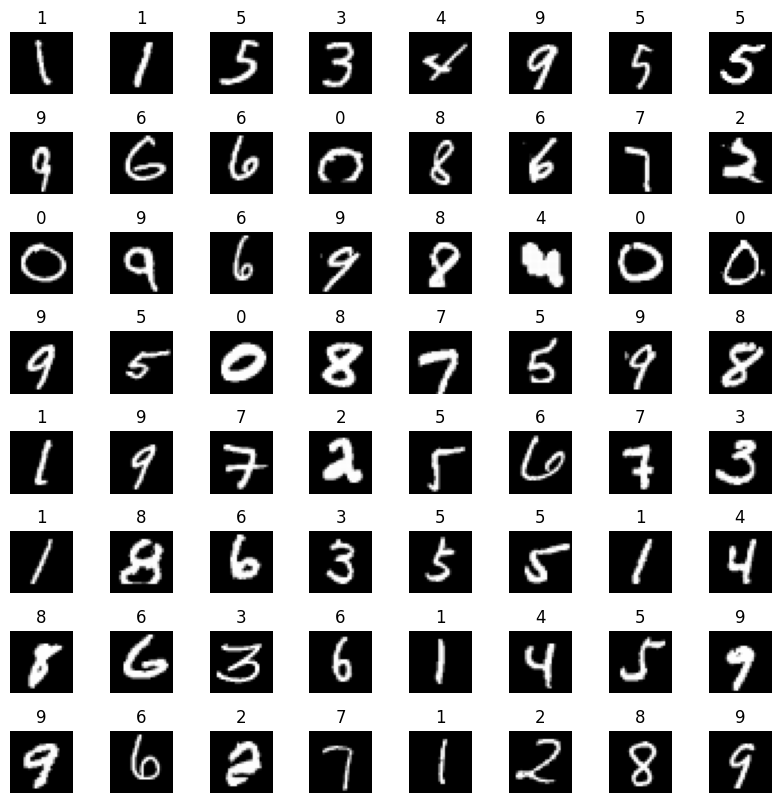

In [36]:
m = X_train.shape[0]

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y_train[random_index])
    ax.set_axis_off()

We will use the kaggle train data as validation set

In [37]:
train = pd.read_csv('train.csv').values
y_val = train[:,0].astype('int32')
X_val = train[:,1:].astype('float32')
X_val = X_val.reshape(-1,28,28,1)
print(X_val.shape, y_val.shape)

(42000, 28, 28, 1) (42000,)


We will keep the Kaggle test set

In [38]:
X_test = pd.read_csv('test.csv').values.astype('float32')
X_test = X_test.reshape(-1, 28, 28, 1)

In [39]:
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255 

One hot encodding needed

In [40]:
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Convolutional Neural Network Model with TensorFlow

In [41]:

model = Sequential([
    # First convolutional layer
    Conv2D(32, kernel_size=(3, 3), strides=1, padding="same", activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D((2, 2), strides=2),
    
    # Second convolutional layer
    Conv2D(64, kernel_size=(3, 3), strides=1, padding="same", activation='relu'),
    MaxPool2D((2, 2), strides=2),
    
    # Flatten the data for the dense part of the network
    Flatten(),
    
    # Dense layers
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for the output
])


1. **Input Shape**: The `input_shape=(28, 28, 1)` in the first layer specifies that the model will take images that are 28 pixels in height and width, with a single color channel (grayscale).

2. **First Convolutional Layer**: 
   - `Conv2D(32, kernel_size=(3, 3), strides=1, padding="same", activation='relu')`: This layer has 32 filters (neurons), each with a kernel size of 3x3 pixels. It uses a stride of 1 (the filter moves one pixel at a time) and 'same' padding (adds padding to the input image to keep the output size equal to the input). The activation function is ReLU (Rectified Linear Unit), which introduces non-linearity to the model, allowing it to learn more complex patterns.
   - `MaxPool2D((2, 2), strides=2)`: This is a max pooling layer with a 2x2 window and a stride of 2. It reduces the spatial dimensions (height and width) of the output from the previous layer by half, thus reducing the number of parameters and computation in the network.

3. **Second Convolutional Layer**:
   - Similar to the first, but with 64 filters. This layer further processes the features extracted by the first layer, capturing more complex patterns in the data.

4. **Flattening**: 
   - `Flatten()`: This layer flattens the 2D outputs from the previous layers into a 1D array to be fed into the dense layers. This is necessary as dense layers expect 1D input.

5. **Dense Layers**:
   - `Dense(128, activation='relu')`: A fully connected layer with 128 neurons. It further processes features extracted by the convolutional layers.
   - `Dense(10, activation='softmax')`: The final layer with 10 neurons, one for each class (digit from 0 to 9). The softmax activation function is used to output a probability distribution overCNN architectures.

In [42]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
hist = model.fit(X_train, y_train, batch_size=100, epochs=25,
          validation_data=(X_val, y_val))

Epoch 1/25
700/700 [==============================] - 24s 33ms/step - loss: 0.1616 - accuracy: 0.9504 - val_loss: 0.0464 - val_accuracy: 0.9860
Epoch 2/25
700/700 [==============================] - 22s 32ms/step - loss: 0.0451 - accuracy: 0.9866 - val_loss: 0.0255 - val_accuracy: 0.9927
Epoch 3/25
700/700 [==============================] - 23s 33ms/step - loss: 0.0309 - accuracy: 0.9907 - val_loss: 0.0224 - val_accuracy: 0.9929
Epoch 4/25
700/700 [==============================] - 22s 31ms/step - loss: 0.0226 - accuracy: 0.9927 - val_loss: 0.0205 - val_accuracy: 0.9936
Epoch 5/25
700/700 [==============================] - 23s 32ms/step - loss: 0.0171 - accuracy: 0.9943 - val_loss: 0.0134 - val_accuracy: 0.9958
Epoch 6/25
700/700 [==============================] - 23s 33ms/step - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.0091 - val_accuracy: 0.9974
Epoch 7/25
700/700 [==============================] - 23s 33ms/step - loss: 0.0105 - accuracy: 0.9966 - val_loss: 0.0063 - val_accuracy:

## Predictions

In [44]:
predictions = model.predict(X_test)
testY = np.argmax(predictions, axis=1)

875/875 [==============================] - 3s 3ms/step


In [45]:
submission = pd.read_csv('sample_submission.csv')
submission['Label'] = testY

In [46]:
submission.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3



![Submission](Submission.png)
